CANDLESTICK CHART - STOCK PRICE VISUALIZATION

1. Generating data for APPLE (Apple Inc.)...
   Generated 60 days of data
   Date Range: 2025-08-26 to 2025-10-24
   Price Range: $166.65 - $182.13


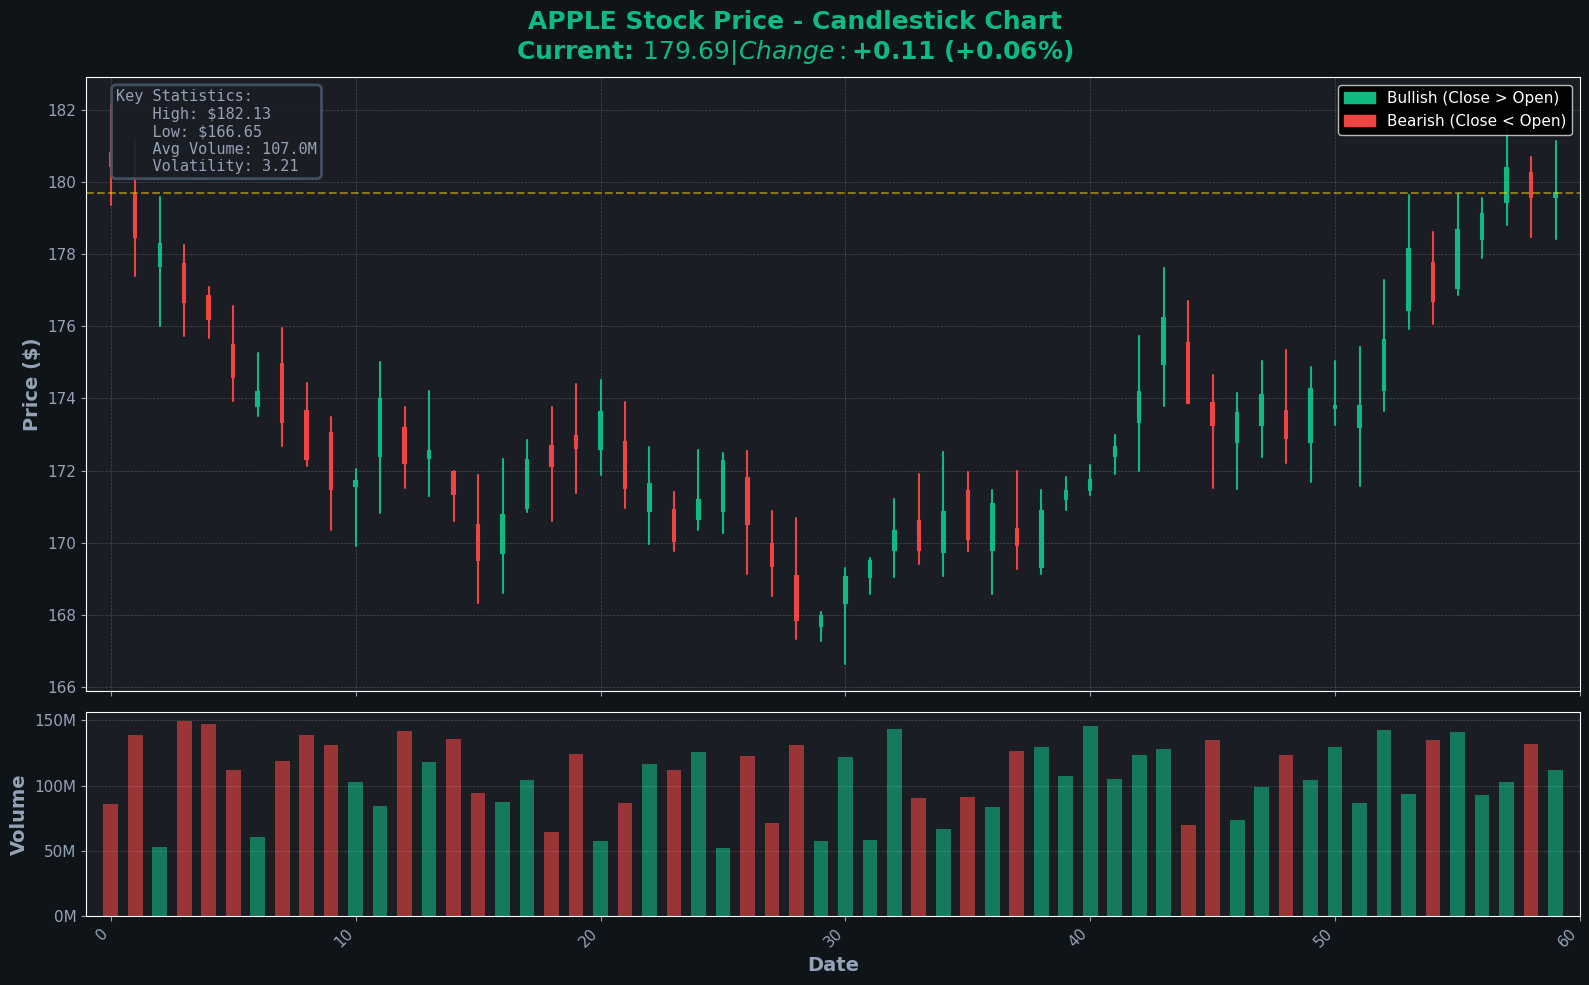


SAMPLE DATA (APPLE - Last 5 Days)
                         Date    Open    High     Low   Close     Volume
55 2025-10-20 21:51:09.049318  177.06  179.68  176.88  178.67  141299103
56 2025-10-21 21:51:09.049318  178.42  179.55  177.89  179.10   93167705
57 2025-10-22 21:51:09.049318  179.45  181.64  178.81  180.39  103007836
58 2025-10-23 21:51:09.049318  180.24  180.70  178.48  179.58  132008891
59 2025-10-24 21:51:09.049318  179.58  181.13  178.41  179.69  112134783

CANDLESTICK CHART ANALYSIS

1. GREEN CANDLE (Bullish):
   - Closing price is HIGHER than opening price
   - Bottom of body = Open price
   - Top of body = Close price
   - Shows upward price movement

2. RED CANDLE (Bearish):
   - Closing price is LOWER than opening price
   - Top of body = Open price
   - Bottom of body = Close price
   - Shows downward price movement

3. WICKS/SHADOWS (Thin lines):
   - Upper wick: Extends from body to the HIGH price
   - Lower wick: Extends from body to the LOW price
   - Shows price 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.dates import DateFormatter
import datetime

# Set style for better visualization
plt.style.use('dark_background')

# Generate realistic stock data
def generate_stock_data(symbol='APPLE', days=60, base_price=180):
    """
    Generate realistic stock OHLC data

    Parameters:
    symbol: Stock symbol
    days: Number of days of data
    base_price: Starting price
    """
    np.random.seed(42)
    dates = pd.date_range(end=datetime.datetime.now(), periods=days, freq='D')

    data = []
    current_price = base_price

    for date in dates:
        # Add some realistic volatility
        volatility = current_price * 0.02
        trend = (np.random.random() - 0.48) * volatility

        open_price = current_price + (np.random.random() - 0.5) * volatility * 0.5
        close_price = open_price + trend
        high_price = max(open_price, close_price) + np.random.random() * volatility * 0.5
        low_price = min(open_price, close_price) - np.random.random() * volatility * 0.5
        volume = np.random.randint(50000000, 150000000)

        data.append({
            'Date': date,
            'Open': round(open_price, 2),
            'High': round(high_price, 2),
            'Low': round(low_price, 2),
            'Close': round(close_price, 2),
            'Volume': volume
        })

        current_price = close_price

    return pd.DataFrame(data)

# Creating candlestick chart
def plot_candlestick(df, symbol='APPLE', figsize=(16, 10)):
    """
    Create a candlestick chart with volume subplot

    Parameters:
    df: DataFrame with OHLC data
    symbol: Stock symbol for title
    figsize: Figure size tuple
    """
    # Creating figure with subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize,
                                    gridspec_kw={'height_ratios': [3, 1]},
                                    facecolor='#0f1419')

    ax1.set_facecolor('#1a1d24')
    ax2.set_facecolor('#1a1d24')


    price_change = df['Close'].iloc[-1] - df['Close'].iloc[-2]
    percent_change = (price_change / df['Close'].iloc[-2]) * 100

    # Main title with current stats
    title_color = '#10b981' if price_change >= 0 else '#ef4444'
    fig.suptitle(f'{symbol} Stock Price - Candlestick Chart\n' +
                 f'Current: ${df["Close"].iloc[-1]:.2f} | ' +
                 f'Change: ${price_change:+.2f} ({percent_change:+.2f}%)',
                 fontsize=18, fontweight='bold', color=title_color, y=0.98)

    # Preparing data for plotting
    width = 0.6
    width2 = 0.05

    # Ploting candlesticks
    for idx, row in df.iterrows():
        date = idx
        open_price = row['Open']
        close_price = row['Close']
        high_price = row['High']
        low_price = row['Low']

        color = '#10b981' if close_price >= open_price else '#ef4444'
        ax1.plot([date, date], [low_price, high_price],
                color=color, linewidth=1.5, solid_capstyle='round')

        # Ploting the open-close rectangle (body)
        height = abs(close_price - open_price)
        bottom = min(open_price, close_price)

        rect = mpatches.Rectangle((date - width2, bottom), width2 * 2, height,
                                  facecolor=color, edgecolor=color, linewidth=1.5)
        ax1.add_patch(rect)

    # Customizing main chart (price)
    ax1.set_ylabel('Price ($)', fontsize=14, fontweight='bold', color='#94a3b8')
    ax1.grid(True, alpha=0.2, linestyle='--', linewidth=0.5)
    ax1.tick_params(colors='#94a3b8', labelsize=11)

    # Format x-axis dates
    ax1.set_xlim(df.index[0] - 1, df.index[-1] + 1)

    # Adding horizontal line at current price
    current_price = df['Close'].iloc[-1]
    ax1.axhline(y=current_price, color='#facc15', linestyle='--',
                linewidth=1.5, alpha=0.5, label=f'Current: ${current_price:.2f}')

    ax1.legend(loc='upper left', fontsize=11, framealpha=0.9)

    # Removing x-axis labels from top chart
    ax1.set_xticklabels([])

    # Ploting volume bars
    colors_volume = ['#10b981' if df['Close'].iloc[i] >= df['Open'].iloc[i]
                     else '#ef4444' for i in range(len(df))]

    ax2.bar(df.index, df['Volume'], color=colors_volume, alpha=0.6, width=width)
    ax2.set_ylabel('Volume', fontsize=14, fontweight='bold', color='#94a3b8')
    ax2.set_xlabel('Date', fontsize=14, fontweight='bold', color='#94a3b8')
    ax2.grid(True, alpha=0.2, linestyle='--', linewidth=0.5, axis='y')
    ax2.tick_params(colors='#94a3b8', labelsize=11)

    # Formating volume numbers
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1e6)}M'))

    # Set x-axis limits for volume chart
    ax2.set_xlim(df.index[0] - 1, df.index[-1] + 1)

    # Rotate date labels
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

    # Adding text box with statistics
    stats_text = f'''Key Statistics:
    High: ${df["High"].max():.2f}
    Low: ${df["Low"].min():.2f}
    Avg Volume: {df["Volume"].mean()/1e6:.1f}M
    Volatility: {df["Close"].std():.2f}'''

    ax1.text(0.02, 0.98, stats_text, transform=ax1.transAxes,
            fontsize=11, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='#1a1d24',
                     edgecolor='#475569', alpha=0.9, linewidth=2),
            color='#94a3b8', family='monospace')

    # Adding legend for candlestick colors
    green_patch = mpatches.Patch(color='#10b981', label='Bullish (Close > Open)')
    red_patch = mpatches.Patch(color='#ef4444', label='Bearish (Close < Open)')
    ax1.legend(handles=[green_patch, red_patch],
              loc='upper right', fontsize=11, framealpha=0.9)

    plt.tight_layout()
    return fig

# Generating data for different stocks
print("CANDLESTICK CHART - STOCK PRICE VISUALIZATION")
print("=" * 45)

#Chart for APPLE Inc.
print("\n1. Generating data for APPLE (Apple Inc.)...")
df_aapl = generate_stock_data(symbol='APPLE', days=60, base_price=180)
print(f"   Generated {len(df_aapl)} days of data")
print(f"   Date Range: {df_aapl['Date'].min().date()} to {df_aapl['Date'].max().date()}")
print(f"   Price Range: ${df_aapl['Low'].min():.2f} - ${df_aapl['High'].max():.2f}")

fig1 = plot_candlestick(df_aapl, symbol='APPLE')
plt.show()

# Displaying sample data
print("\n" + "=" * 60)
print("SAMPLE DATA (APPLE - Last 5 Days)")
print("=" * 60)
print(df_aapl[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']].tail())

print("\n" + "=" * 60)
print("CANDLESTICK CHART ANALYSIS")
print("=" * 60)
print("""
1. GREEN CANDLE (Bullish):
   - Closing price is HIGHER than opening price
   - Bottom of body = Open price
   - Top of body = Close price
   - Shows upward price movement

2. RED CANDLE (Bearish):
   - Closing price is LOWER than opening price
   - Top of body = Open price
   - Bottom of body = Close price
   - Shows downward price movement

3. WICKS/SHADOWS (Thin lines):
   - Upper wick: Extends from body to the HIGH price
   - Lower wick: Extends from body to the LOW price
   - Shows price volatility during the period

4. BODY (Thick rectangle):
   - Shows the range between Open and Close prices
   - Larger body = stronger price movement
   - Smaller body = less price movement

5. VOLUME BARS (Bottom chart):
   - Shows trading activity
   - Green = Buying pressure (price went up)
   - Red = Selling pressure (price went down)
""")



